In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
sns.set_theme()

In [14]:
CYCLIC_COLUMNS = ["PSVTime", "PSV", "PDVTime", "PDV", "EDVTime", "EDV", "ISVTime", "ISV", "MBF1", "MBF2", "SysTime", "DiasTime", "OSI", "WindowTime"]
TIME_SERIES_COLUMNS = ["Time","BloodFlow","Filtered Blood Flow", "Shear", "Filtered Shear", "Velocity", "Diameter"]
ANALYSIS_SETTINGS_COLUMNS = ["Peak Height Threshold","Cycle Duration", "Peak Count", "EpochEndTime", "Velocity Calibration", "Time Calibration", "Distance Calibration", "Zero Velocity Row Position"]

In [15]:
filename = "ASCI017- baseline long flow 20210122143712051"
folder = f"bloodflow_data/{filename[:7]}"

In [16]:
analysis_settings = pd.read_csv(f"{folder}/{filename}_analysis_settings.csv", header=None)
analysis_settings.columns = ANALYSIS_SETTINGS_COLUMNS
analysis_settings

,Peak Height Threshold,Cycle Duration,Peak Count,EpochEndTime,Velocity Calibration,Time Calibration,Distance Calibration,Zero Velocity Row Position
0,18,1.0702,9,8.8813,0.70299,0.001279,0.01436,152


In [17]:
cyclic = pd.read_csv(f"{folder}/{filename}_cyclic.csv", header = None)

cyclic.columns = CYCLIC_COLUMNS
cyclic

,PSVTime,PSV,PDVTime,PDV,EDVTime,EDV,ISVTime,ISV,MBF1,MBF2,SysTime,DiasTime,OSI,WindowTime
0,0.48071,411.17,0.88131,107.270,1.3921,119.2700,0.29043,142.4000,224.65,247.48,0.19028,0.91135,0.051225,1.10160
1,1.57230,360.01,1.85280,103.550,2.3535,133.6900,1.39210,119.2700,216.38,208.04,0.18027,0.78116,0.209780,0.96143
2,2.52370,345.32,2.99440,161.810,3.4051,99.5070,2.35350,133.6900,201.91,212.32,0.17025,0.88131,0.255480,1.05160
3,3.56530,312.94,3.67550,71.575,4.5167,5.3157,3.40510,99.5070,146.01,162.31,0.16024,0.95141,0.181570,1.11170
4,4.75710,231.42,5.19770,120.680,5.5482,118.7000,4.51670,5.3157,134.44,138.68,0.24036,0.79118,0.015273,1.03150
5,5.79860,366.56,6.25930,124.750,6.5497,78.3750,5.54820,118.7000,172.20,172.46,0.25037,0.75112,0.103210,1.00150
6,6.81010,333.32,7.27080,62.013,7.7916,84.2750,6.54970,78.3750,159.77,198.40,0.26039,0.98146,0.130740,1.24180
7,8.33240,249.58,8.77300,103.240,8.8732,96.0740,8.17210,139.9700,142.87,100.16,0.16024,0.54080,0.196420,0.70104


Text(0.5, 1.0, 'ASCI017 Baseline')

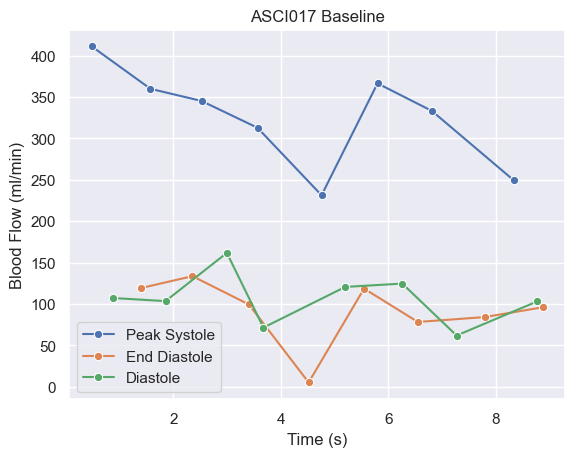

In [18]:
sns.lineplot(data = cyclic, x = "PSVTime", y = "PSV", label = "Peak Systole", marker = 'o')
sns.lineplot(data = cyclic, x = "EDVTime", y = "EDV", label = "End Diastole", marker = 'o')
sns.lineplot(data = cyclic, x = "PDVTime", y = "PDV", label = "Diastole", marker = 'o')
plt.ylabel("Blood Flow (ml/min)")
plt.xlabel("Time (s)")
plt.title(f"{filename[:7]} Baseline")

Text(0.5, 1.0, 'ASCI017 Baseline')

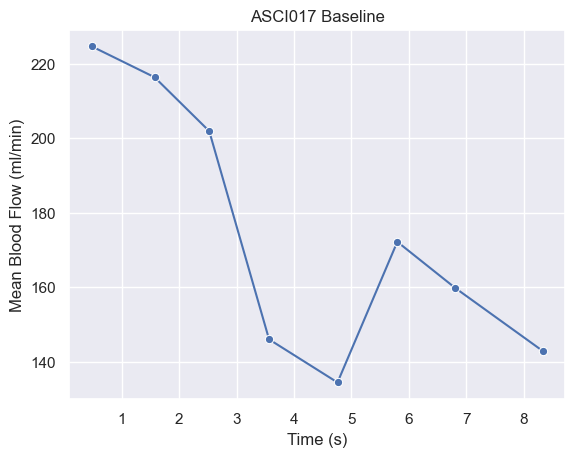

In [19]:
sns.lineplot(data=cyclic, x="PSVTime", y="MBF1", marker='o')
plt.ylabel("Mean Blood Flow (ml/min)")
plt.xlabel("Time (s)")
plt.title(f"{filename[:7]} Baseline")

In [20]:
time_series = pd.read_csv(f"{folder}/{filename}_time_series.csv", header = None)
time_series.columns = TIME_SERIES_COLUMNS
time_series

,Time,BloodFlow,Filtered Blood Flow,Shear,Filtered Shear,Velocity,Diameter
0,0.000000,0.00,-23.002,0.00,-15.107,0.000,0.5056
1,0.010015,0.00,67.167,0.00,44.112,0.000,0.5056
2,0.020030,176.44,128.370,115.88,84.309,14.647,0.5056
3,0.030045,182.07,165.580,119.58,108.750,15.114,0.5056
4,0.040060,169.37,183.760,111.23,120.690,14.060,0.5056
...,...,...,...,...,...,...,...
910,9.113500,268.18,280.490,176.12,184.210,22.262,0.5056
911,9.123600,313.35,283.280,205.79,186.040,26.012,0.5056
912,9.133600,305.59,291.710,200.70,191.580,25.368,0.5056
913,9.143600,311.67,306.210,204.69,201.100,25.873,0.5056


<Axes: xlabel='Time', ylabel='Velocity'>

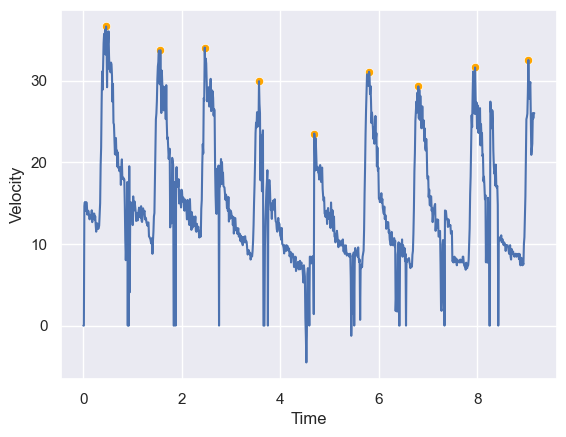

In [21]:
peaks = sp.signal.find_peaks(
    time_series['Velocity'], distance=50, height=20)[0]
sns.scatterplot(x=time_series['Time'].iloc[peaks],
                y=time_series['Velocity'].iloc[peaks], color='orange')
sns.lineplot(time_series, x="Time",  y="Velocity")

In [22]:
time_series['Velocity'].iloc[peaks].mean()

31.359333333333332

<Axes: xlabel='Time', ylabel='Filtered Shear'>

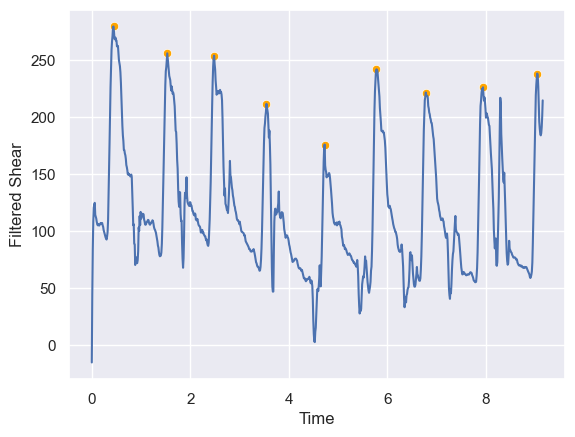

In [23]:
peaks = sp.signal.find_peaks(
    time_series['Filtered Shear'], distance=50, height=150)[0]
sns.scatterplot(x=time_series['Time'].iloc[peaks],
                y=time_series['Filtered Shear'].iloc[peaks], color='orange')
sns.lineplot(time_series, x="Time",  y="Filtered Shear")

In [24]:
time_series['Filtered Shear'].iloc[peaks].mean()

234.10333333333332